In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Linear Regression</h1>

<h2>1. Linear Regression, one variable</h2>

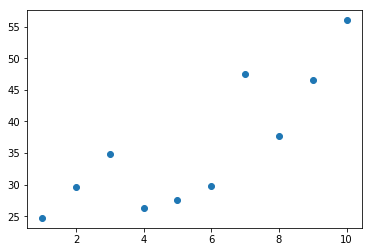

In [16]:
x = np.arange(1, 11)

# Create random values for y
y = 10 + 3*x + 5*np.random.randn(10) + 10
plt.plot(x, y, 'o')
plt.show()

Let $x = [x_1, x_2, \ldots, x_n]^T$ and $y = [y_1, y_2, \ldots, y_n]^T$. 

The design matrix $X$ contains two columns
$$X = \begin{bmatrix}
1& x_1 \\
1& x_2 \\
\vdots& \vdots \\
1& x_n
\end{bmatrix}
$$
We can calculate the regression coefficients $M = [\theta_0, \theta_1]^T$ by
$$M = (X^T X)^{-1} X^T y$$

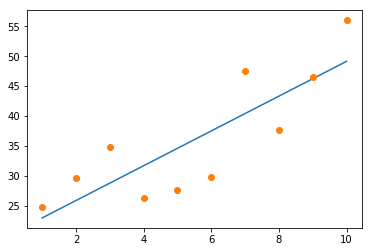

In [17]:
# Design matrix X = [1 x]
X = np.concatenate((np.ones((10,1)), x.reshape(10,1)), axis=1)

# Target values y
Y = y.reshape((10,1))

# Calculate the regression coefficients
M = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(Y)

z = X.dot(M)
plt.plot(x, z)
plt.plot(x, y, 'o')
plt.show()

<h2>2. Regression, one variable, fitting a second order polynomial</h2>

We fit a second order model
$$y_i = \theta_0 + \theta_1 x_i + \theta_2 x_i^2$$
to the data. The design matrix $X$ now contains three columns
$$X = \begin{bmatrix}
1& x_1& x_1^2 \\
1& x_2& x_2^2 \\
\vdots& \vdots& \vdots \\
1& x_n& x_n^2
\end{bmatrix}
$$

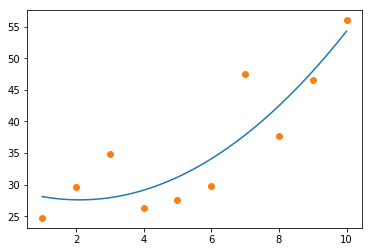

In [18]:
X = np.concatenate((np.ones((10,1)), x.reshape(10,1), x.reshape(10,1)**2), axis=1)
Y = y.reshape((10,1))
M = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(Y)

xx = np.linspace(1, 10, 1000)
XX = np.concatenate((np.ones((1000,1)), xx.reshape(1000,1), xx.reshape(1000,1)**2), axis=1)

yy = XX.dot(M)
plt.plot(xx, yy)
plt.plot(x, y, 'o')
plt.show()

<h2>3. Fitting a higher order polynomial</h2>

We the use the Python command polyfit to fit a higher order polynomial
$$y_i = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 + \cdots + \theta_k x_i^k$$
to the data. 

A 9th order polynomial has 10 parameters and can be made to fit the 10 datapoints perfectly. 
However, the polynomial often oscillates wildly between datapoints. It is therefore bad for estimating new values. 
This is called overfitting: the model learns the data very well, but is bad at predicting previously unseen values.
    
Try yourself, how model behaves if you change the order $k$ of the polynomial in the command "polyfit(x, y, k)".

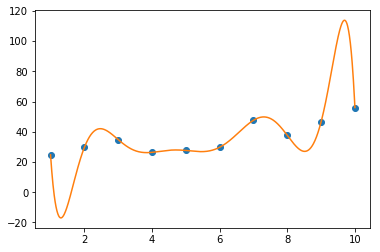

In [19]:
coef = np.polyfit(x, y, 9)
p = np.poly1d(coef)

xx = np.linspace(1, 10, 1000)
yy = p(xx)
plt.plot(x, y, 'o')
plt.plot(xx, yy)
plt.show()

<h2>4. Regression, multiple variables</h2>

We can use normal equations to fit a model, which explains a single target variable $y$ by several features $x^{(1)}, x^{(2)}, \ldots, x^{(m)}$. The model is
$$y_i = \theta_0 + \theta_1 x^{(1)}_i + \theta_2 x^{(2)}_i + \cdots + \theta_m x^{(m)}_i$$

We create a design matrix
$$X = \begin{bmatrix}
1& x_1^{(1)}& x_1^{(2)}& \ldots& x_1^{(m)} \\
1& x_2^{(1)}& x_2^{(2)}& \ldots& x_2^{(m)} \\
1& x_3^{(1)}& x_3^{(2)}& \ldots& x_3^{(m)} \\
\vdots& \vdots& \vdots&\ddots &\vdots \\
1& x_n^{(1)}& x_n^{(2)}& \ldots& x_n^{(m)}
\end{bmatrix}
$$

The coefficients $M = [\theta_o \theta_1 \theta_2 \cdots \theta_m]^T$ can be calculated as above
$$M = (X^T X)^{-1} X^T y$$

In [20]:
from keras.datasets import boston_housing

# Download the data

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()


# Create the feature matrices

n = len(train_data)  # 404
m = len(test_data)  # 102

X = np.concatenate((np.ones((n, 1)), train_data), axis=1)
X_test = np.concatenate((np.ones((m, 1)), test_data), axis=1)


# Create target vectors

y = train_targets.reshape(n, 1)
y_test = test_targets.reshape(m, 1)

# Calculate the regression coefficients

M = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

y_estimate = X_test.dot(M)
results = np.concatenate((y_test, y_estimate, y_estimate - y_test), axis=1)
results

Using TensorFlow backend.


array([[  7.2       ,   9.69267239,   2.49267239],
       [ 18.8       ,  21.05859431,   2.25859431],
       [ 19.        ,  20.94145461,   1.94145461],
       [ 27.        ,  34.25223414,   7.25223414],
       [ 22.2       ,  25.95902598,   3.75902598],
       [ 24.5       ,  20.56741038,  -3.93258962],
       [ 31.2       ,  28.15310405,  -3.04689595],
       [ 22.9       ,  25.07113862,   2.17113862],
       [ 20.5       ,  20.30519458,  -0.19480542],
       [ 23.2       ,  22.82489511,  -0.37510489],
       [ 18.6       ,  20.29027213,   1.69027213],
       [ 14.5       ,  18.07938917,   3.57938917],
       [ 17.8       ,  16.46141024,  -1.33858976],
       [ 50.        ,  35.31166595, -14.68833405],
       [ 20.8       ,  19.41369959,  -1.38630041],
       [ 24.3       ,  19.34727116,  -4.95272884],
       [ 24.2       ,  24.58140904,   0.38140904],
       [ 19.8       ,  21.01346252,   1.21346252],
       [ 19.1       ,  19.99079236,   0.89079236],
       [ 22.7       ,  23.79286

In [21]:
print('Linear regression mean absolute error:', np.sum(np.abs(y_estimate - y_test))/m)

Linear regression mean absolute error: 3.46418581241
